# Classificador Linear em Tensorflow

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Gera dois grupos de pontos em um plano 2D para dados sintéticos

In [60]:
samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]], # define espalhamento dos pontos
    size=samples
                                                )
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=samples
                                                )

In [61]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [62]:
inputs

array([[-0.38549256,  3.6204994 ],
       [-0.25953218,  1.8050976 ],
       [ 0.44858408,  2.5145607 ],
       ...,
       [ 2.536304  ,  1.2266937 ],
       [ 2.7518299 , -1.6112908 ],
       [ 3.515616  , -0.3280906 ]], dtype=float32)

In [63]:
targets = np.vstack((np.zeros((samples, 1), dtype='float32'),
                     np.ones((samples, 1), dtype='float32')))

In [64]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14120\1393053312.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


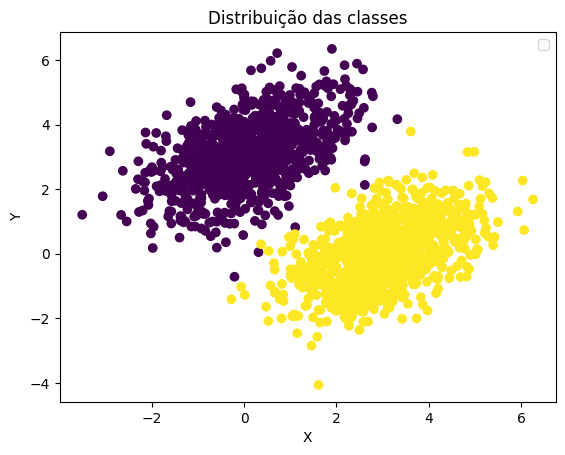

In [65]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribuição das classes")
plt.show()

### Cria variáveis do classificador: pesos e bias

In [66]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform
                (shape=(input_dim, output_dim)))

b = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))

def model(inputs):
    return tf.matmul(inputs, W) + b # usa matmul pois temos muitas entradas

In [67]:
def square_loss(targets, predictions): # implementaçao do MSE
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [68]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_W, grad_loss_b = tape.gradient(loss, [W,b]) # calcula como cada peso (w) e o bias afetam a loss

    # atualizar pesos 
    W.assign_sub(grad_loss_W * learning_rate) # subtrai o gradiente da variavel
    b.assign_sub(grad_loss_b * learning_rate)

    return loss

In [69]:
for step in range(40):
 loss = training_step(inputs, targets)
 print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 7.9683
Loss at step 1: 1.3400
Loss at step 2: 0.3543
Loss at step 3: 0.1861
Loss at step 4: 0.1501
Loss at step 5: 0.1361
Loss at step 6: 0.1262
Loss at step 7: 0.1177
Loss at step 8: 0.1100
Loss at step 9: 0.1029
Loss at step 10: 0.0964
Loss at step 11: 0.0904
Loss at step 12: 0.0850
Loss at step 13: 0.0800
Loss at step 14: 0.0754
Loss at step 15: 0.0712
Loss at step 16: 0.0673
Loss at step 17: 0.0638
Loss at step 18: 0.0605
Loss at step 19: 0.0575
Loss at step 20: 0.0548
Loss at step 21: 0.0523
Loss at step 22: 0.0500
Loss at step 23: 0.0479
Loss at step 24: 0.0460
Loss at step 25: 0.0442
Loss at step 26: 0.0426
Loss at step 27: 0.0411
Loss at step 28: 0.0397
Loss at step 29: 0.0385
Loss at step 30: 0.0373
Loss at step 31: 0.0363
Loss at step 32: 0.0353
Loss at step 33: 0.0344
Loss at step 34: 0.0336
Loss at step 35: 0.0329
Loss at step 36: 0.0322
Loss at step 37: 0.0316
Loss at step 38: 0.0310
Loss at step 39: 0.0305


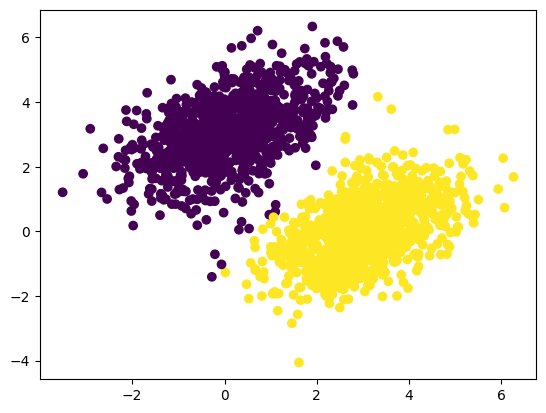

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # se resultado for menor que 0.5 entao pertence a classe 0
plt.show()

Rearranjou a equação da reta para dividir em classes entre 0 e 1

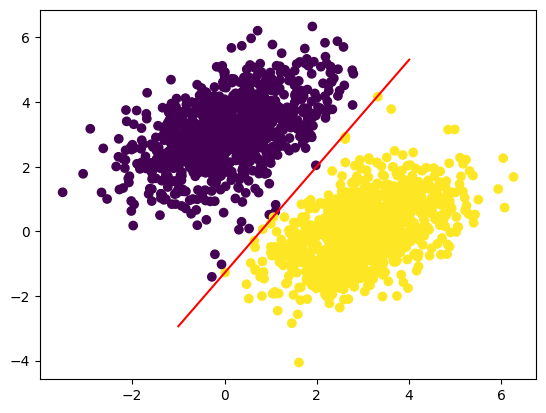

In [71]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)